# EECS 4415 - Task 5

##Page Rank with NetworkX

### Setup

First of all, we authenticate a Google Drive client to download the dataset we will be processing in this Colab.

**Make sure to follow the interactive instructions.**

In [1]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id='1EoolSK32_U74I4FeLox88iuUB_SUUYsI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('web-Stanford.txt')

If you executed the cells above, you should be able to see the dataset we will use for this Colab under the "Files" tab on the left panel.

Next, we import some of the common libraries needed for our task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

For this Colab we will be using [NetworkX](https://networkx.github.io), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks ([tutorial](https://networkx.org/documentation/stable/tutorial.html)).

The dataset we will analyze is a snapshot of the Web Graph centered around [stanford.edu](https://stanford.edu). Nodes represent pages from Stanford University (stanford.edu) and directed edges represent hyperlinks between them. [[More Info]](http://snap.stanford.edu/data/web-Stanford.html)

In [4]:
import networkx as nx

G = nx.read_edgelist('web-Stanford.txt', create_using=nx.DiGraph)

#### Function to print graph information

In [5]:
def print_graph_info(G, directed=True):
  print("Number of nodes:", len(G.nodes))
  print("Number of edges:", len(G.edges))
  if directed:
    print("Average in-degree:", sum(dict(G.in_degree).values()) / len(G.nodes))
    print("Average out-degree:", sum(dict(G.out_degree).values()) / len(G.nodes))
  else:
    print("Average degree:", sum(dict(G.degree).values()) / len(G.nodes))

In [6]:
print_graph_info(G, True)

Number of nodes: 281903
Number of edges: 2312497
Average in-degree: 8.203165627893283
Average out-degree: 8.203165627893283


### Your Task

To begin with, let's simplify our analysis by ignoring the dangling nodes and the disconnected components in the original graph.

Given a directed graph, a weakly connected component (WCC) is a subgraph of the original graph, where all vertices are connected to each other by some path, ignoring the direction of edges.

The directed graph G below is weakly connected since its underlying undirected graph Ĝ is connected.

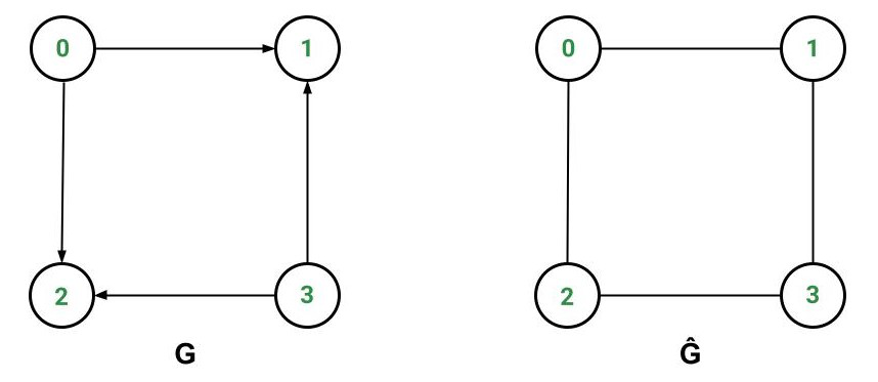

In the below directed graph, there are two weakly connected components:
* [0, 1, 2, 3] (largest WCC)
* [4, 5]

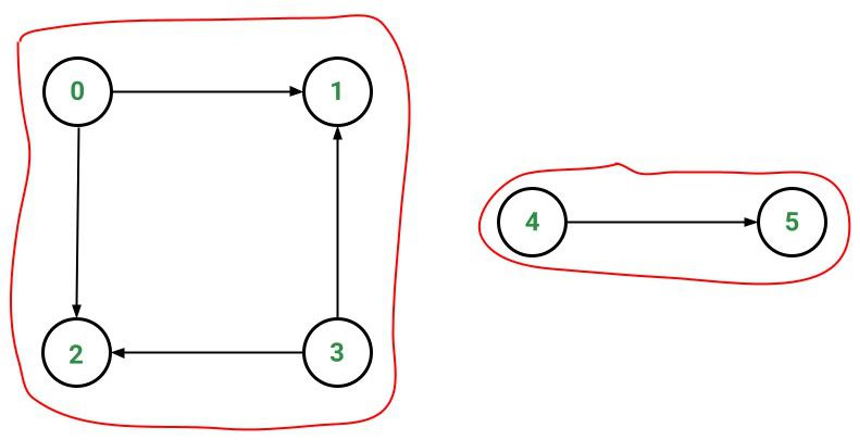

Use NetworkX to identify the **largest** weakly connected component in the ```G``` graph.  **From now on, use this connected component for all the following tasks.**

Print graph information.

In [7]:
''' 3 lines of code in total expected. Execution time should be less than 30 seconds'''

# YOUR CODE HERE
weak_G = nx.weakly_connected_components(G)
weak_G = nx.subgraph(G, max(weak_G, key=len))
print_graph_info(weak_G, False)

Number of nodes: 255265
Number of edges: 2234572
Average degree: 17.507860458738957


Compute the PageRank vector, using the default parameters in NetworkX: [https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pageranky](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)


In [8]:
''' 1 line of code in total expected. Execution time should be around or less than 15 seconds.'''
# YOUR CODE HERE
rank_vector = nx.pagerank(weak_G)

Display page rank values for Top-k nodes, setting k to 10.

In [9]:
''' 3 lines of code in total expected.'''
#YOUR CODE HERE
k = 10
rank_vector_sorted = sorted(rank_vector.items(), key=lambda x: x[1], reverse=True)
rank_vector_sorted[:k]

[('89073', 0.011051585882434985),
 ('226411', 0.010694113250567905),
 ('241454', 0.009829260884719991),
 ('134832', 0.00650923773721211),
 ('69358', 0.003753708143672675),
 ('67756', 0.003543473943866138),
 ('105607', 0.0032305919516859047),
 ('225872', 0.0031736850016296342),
 ('234704', 0.0031708863624340614),
 ('186750', 0.00314345200380852)]

In 1999, Barabási and Albert proposed an elegant mathematical model which can generate graphs with topological properties similar to the Web Graph (also called Scale-free Networks).

As such, we will use two different graph generator methods, and then we will test how well they approximate the Web Graph structure by means of comparing the respective PageRank vectors. [[NetworkX Graph generators]](https://networkx.github.io/documentation/stable/reference/generators.html#)

Using the parameters ```seed = 1``` and ```directed=False``` where applicable, generate:


1.   a random graph (with the fast method), setting ```n``` equal to the number of nodes in the original connected component, and ```p = 0.00008```
2.   a Barabasi-Albert graph (with the standard method), setting ```n``` equal to the number of nodes in the original connected component, and finding the right ***integer*** value for ```m``` such as the resulting number of edges **approximates by excess(the value that is closest to and satisfies $\geq$)** the number of edges in the original connected component (the largest weakly connected component you attained above)

and compute the PageRank vectors for both graphs. Print generated graph's information. Also, display page rank values for Top-k nodes, setting k to 10.


In [10]:
''' 12-14 lines of code in total expected but can differ based on your style.
The execution time for one pagerank computation should be around 20 seconds.'''

# YOUR CODE HERE
n = weak_G.number_of_nodes()
p = 0.00008

# barabasi-albert requires m < n
# some value of m causes memory overlaod on google colab environment

m = 17 #average degree of the largest weakly connected component


In [11]:
random_graph = nx.fast_gnp_random_graph(n, p, seed=1, directed=False)

In [12]:
BA_graph = nx.barabasi_albert_graph(n, m, seed=1)

In [13]:
random_rank_vector = nx.pagerank(random_graph)

In [14]:
BA_rank_vector = nx.pagerank(BA_graph)

In [15]:
print_graph_info(random_graph, False)

Number of nodes: 255265
Number of edges: 2606386
Average degree: 20.421021291598926


In [16]:
print_graph_info(BA_graph, False)

Number of nodes: 255265
Number of edges: 4339216
Average degree: 33.9977356864435


In [17]:
random_rank_sorted = sorted(random_rank_vector.items(), key=lambda x: x[1], reverse=True)
random_rank_sorted[:k]

[(150787, 7.458986619588909e-06),
 (14579, 7.3974735409810506e-06),
 (193475, 7.368176905091742e-06),
 (141505, 7.348699650919032e-06),
 (144307, 7.323021888645532e-06),
 (184745, 7.313541287755495e-06),
 (129032, 7.299830669613334e-06),
 (70124, 7.268730168861052e-06),
 (239691, 7.228833381965614e-06),
 (127392, 7.197456973720354e-06)]

In [18]:
BA_rank_sorted = sorted(BA_rank_vector.items(), key=lambda x: x[1], reverse=True)
BA_rank_sorted[:k]

[(0, 0.0003265880910577766),
 (22, 0.0003200611834206232),
 (18, 0.00031789406200614326),
 (19, 0.000314783794856432),
 (21, 0.00029653471478184465),
 (25, 0.0002947845912099176),
 (27, 0.0002512705769151705),
 (37, 0.00025102622222969375),
 (23, 0.00024719810894467393),
 (31, 0.00024624460023823185)]

Compare the PageRank vectors obtained on the generated graphs with the PageRank vector you computed on the original connected component (the largest weakly connected component you attained above).
**Sort** the components of each vector by value, and use cosine similarity as similarity measure.

Feel free to use any implementation of the cosine similarity available in third-party libraries, or implement your own with ```numpy```.

In [19]:
''' 8-10 lines of code in total expected but can differ based on your style.'''

# YOUR CODE HERE
from sklearn.metrics.pairwise import cosine_similarity

df = pd.DataFrame(columns=[x for x in range(len(weak_G.nodes))],index=['weakly_connected', 'random_graph', 'BA_graph'])
df.loc['weakly_connected'] = list(map(lambda x: x[1], rank_vector_sorted))
df.loc['random_graph'] = list(map(lambda x: x[1], random_rank_sorted))
df.loc['BA_graph'] = list(map(lambda x: x[1], BA_rank_sorted))

cosine_similarity(df,df)


array([[1.        , 0.10395565, 0.62075722],
       [0.10395565, 1.        , 0.71043488],
       [0.62075722, 0.71043488, 1.        ]])

Remark for the Random Graph and the Barabási–Albert model, which one is better when it comes to generating a graph resembling the World Wide Web (in two sentences).

Given the result from the cosine similarity, Barabasi-Albert model show more resemblence to the original than random graph, which means the graph of Barabasi-Albert model has more similar structure to the original. This implies that Barabasi-Albert model is more suitable to simulate World Wide Web.



Write a paragraph of conclusions below summarizing your insights.

Given that the page rank values for each graph are normalized, the weakly connected component seems to have more deviation than the other two since its top k (=10) values are at least 100 times greater than the others. So, the cosine similarity in this context can be expressed in alternative way: the cosine similarity value of two vectors indicates how value distribution of one vector similar to the other's. Hence, the fact that Barabasi-Albert graph has higher cosine similarity towards the weakly connected component than the one of the Rangom graph implies that Barabasi-Albert PageRank value distribution is more similar to the weakly connected component than the Random graph, and therefore, Barabasi-Albert is more suitable to simulate World Wide Web.  

Once you have working code for each cell above, **head over to eClass and submit your solution for this Colab**!